In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.min_rows = 20

df = pd.read_csv('Titanic-train.csv')
len(df.columns)
column_names = df.columns[[1,2,3,4,5,6,7,9,11]]
column_names

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<h4>Sprawdzamy ilość unikalnych elementów w poszczególnych kolumnach (atrybutach) oraz typ danych przechowywany w tej kolumnie.<br>
Czy mamy do czynienia ze zmiennymi kategorycznymi (jakościowymi), czy też numerycznymi (ilościowymi)</h4>

In [3]:
for col_name in df.columns:
    print(f'{col_name:12}- unikalne elementy: {len(df[col_name].unique()):^4}- typ[{df[col_name].dtype}]')

PassengerId - unikalne elementy: 891 - typ[int64]
Survived    - unikalne elementy:  2  - typ[int64]
Pclass      - unikalne elementy:  3  - typ[int64]
Name        - unikalne elementy: 891 - typ[object]
Sex         - unikalne elementy:  2  - typ[object]
Age         - unikalne elementy:  89 - typ[float64]
SibSp       - unikalne elementy:  7  - typ[int64]
Parch       - unikalne elementy:  7  - typ[int64]
Ticket      - unikalne elementy: 681 - typ[object]
Fare        - unikalne elementy: 248 - typ[float64]
Cabin       - unikalne elementy: 148 - typ[object]
Embarked    - unikalne elementy:  4  - typ[object]


In [9]:
def check_if_outlier(DF : pd.DataFrame, feature : str = '', degree = 2):
        """Funkcja zwracająca Prawdę lub Fausz w zależności czy element jest odstający.
        dane wejściowe - pd.DataFrame z wartościami numerycznymi. 
        dane wyjściowe pd.Series zwracający True i False."""
        std_dev = DF[feature].std()
        miu = DF[feature].mean()
        ret_val = []
        for elt in DF[feature]:
            if elt > miu + degree * std_dev or elt < miu - degree * std_dev:
                ret_val.append(True)
            else: 
                ret_val.append(False)
        return pd.Series(ret_val)

def opisz_dane (df: pd.DataFrame) -> pd.DataFrame:
    wiersze = ('wszystkie elementy','unikalne elementy', 'braki (NA/nan)', 'max', 'min', 'średnia arytmetyczna', 'mediana', 'moda',
    'ochylenie standardowe', 'ilosc elementów odstających')

    is_numeric = {column_name: True if ('int' in str(df[column_name].dtype)  or df[column_name].dtype =='float') else False for column_name in df.columns}
    all_items = {column_name : df[column_name].count() for column_name in df.columns}
    unique_items = {column_name : df[column_name].value_counts().count() for column_name in df.columns}
    brak_w_items = {column_name : sum(df[column_name].isna()) for column_name in df.columns}
    max_items = {column_name: df[column_name].max() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    min_items = {column_name: df[column_name].min() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    average_items = {column_name: df[column_name].mean() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    median_items = {column_name: df[column_name].median() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    mode_items = {column_name: df[column_name].mode() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    std_deviation = {column_name: df[column_name].std() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    outliers = {column_name: check_if_outlier(df, column_name).sum() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    serie= [all_items, unique_items, brak_w_items, max_items, 
    min_items, average_items,median_items,mode_items,std_deviation,outliers]

#    print(pd.DataFrame(serie, index = wiersze))
    return pd.DataFrame(serie, index = wiersze)

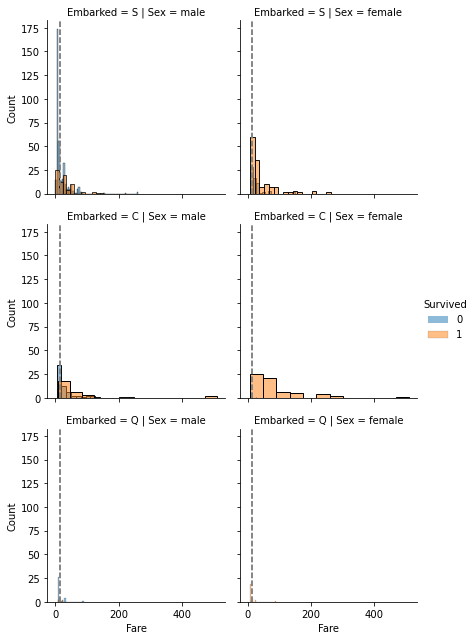

In [5]:
sijatka = sns.FacetGrid(df,col = 'Sex', row = 'Embarked',hue = 'Survived',)
sijatka.map_dataframe(sns.histplot, x = 'Fare', multiple = 'layer', alpha = 0.5, )
sijatka.refline(x=df["Fare"].median())
sijatka.add_legend()

In [13]:
a = pd.DataFrame({'qq':[1,1,1,1,10,1,1,2,3,-8]})
for i in a:
    print(a)
#check_if_outlier()

   qq
0   1
1   1
2   1
3   1
4  10
5   1
6   1
7   2
8   3
9  -8
